# Red Wine Quality Prediction

This project aims to predict wine quality and use exploratory data analysis (EDA) techniques to explore relationships in one variable to multiple variables and to explore selected red wine data set for visualizations, distributions, outliers, and anomalies.
The main question is “Which properties influence the quality of red wines?” During my exploratory analysis, I will try to answer this question and implement EDA tehniques using python programming language.

In [2]:
#Loading packages
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, accuracy_score
from sklearn.tree import export_graphviz
from sklearn.metrics import precision_recall_curve, auc
from sklearn.model_selection import cross_val_predict, cross_val_score

# Loading Dataset

In [18]:
df = pd.read_csv("winequality-red.csv") #loading the dataset
df.head()                         # Display top 5 rows

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Exploratory data analysis

In [3]:
df.shape                 # no. of rows and columns

(1599, 12)

The dataset has 1599 rows and 12 columns

In [4]:
df.isnull().sum()                 # to check null values if any

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

The dataset has no missing value

In [5]:
df.dtypes     #datatype in each column

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

All the columns are float datatype except quality which is int datatype

In [6]:
df.columns     #all the columns names in the dataset

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Attributes Information

Input variables (based on physicochemical tests):
    
1. fixed acidity (tartaric acid - g / dm^3)
2. volatile acidity (acetic acid - g / dm^3)
3. citric acid (g / dm^3)
4. residual sugar (g / dm^3)
5. chlorides (sodium chloride - g / dm^3
6. free sulfur dioxide (mg / dm^3)
7. total sulfur dioxide (mg / dm^3)
8. density (g / cm^3)
9. pH
10.sulphates (potassium sulphate - g / dm3)
11.alcohol (% by volume)
              
Output variable (based on sensory data):
              
12.quality (score between 0 and 10)

In [9]:
df.describe()  #decribe the dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Here we can see that our target data is discrete. We are going to convert it into categorical data by setting a cut-off value, as the target value which is greater than or equal 7 will be categorised as 1(good) and below it can be categorised as 0(bad)

### Univariate analysis

<AxesSubplot:xlabel='quality', ylabel='count'>

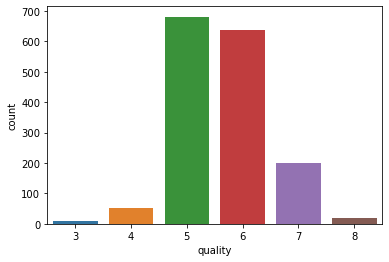

In [12]:
sns.countplot(df['quality'])

Here we can see that our target data is discrete. We are going to convert it into categorical data by setting a cut-off value, as the target value which is greater than or equal 7 will be categorised as 1(good) and below it can be categorised as 0(bad).

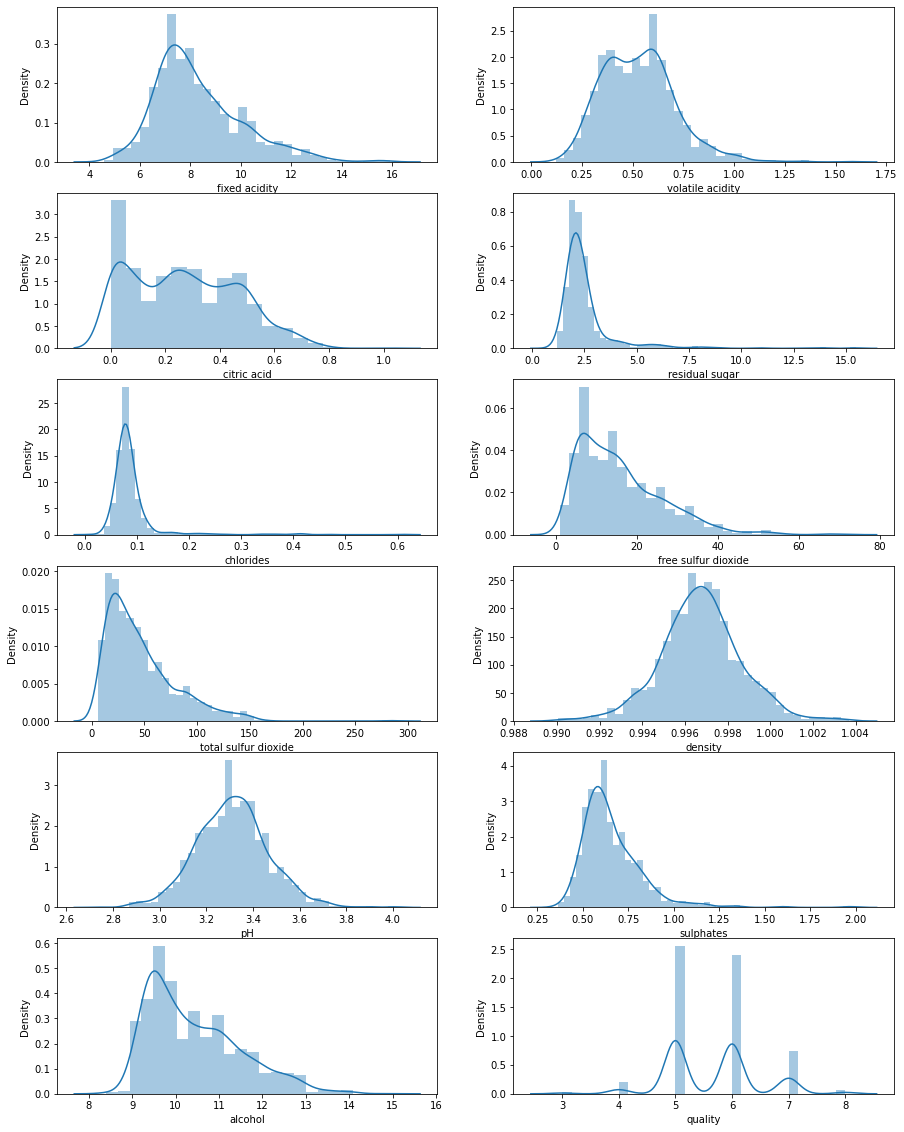

In [10]:
i=1
plt.figure(figsize=(15,20))
for col in df.columns:
    plt.subplot(6,2,i)
    sns.distplot(df[col])
    i+=1

In [106]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

Skewness is present in every column except citric acid, density,pH and quality and skewness is needed to be removed.

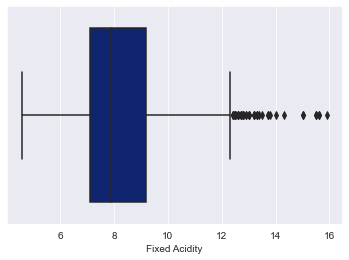

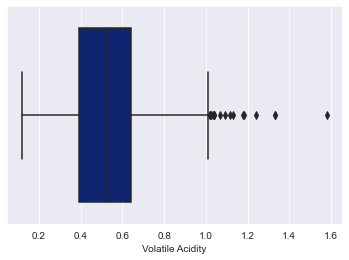

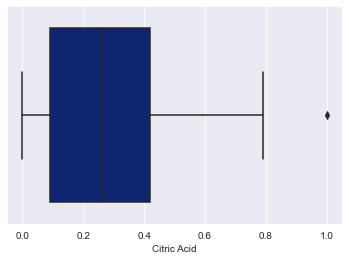

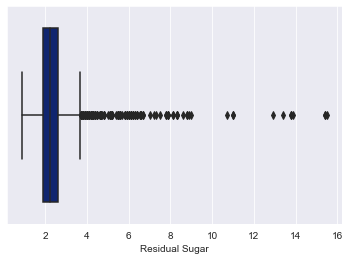

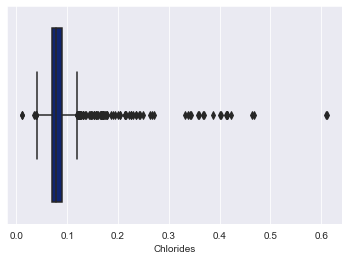

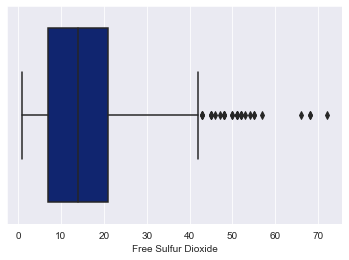

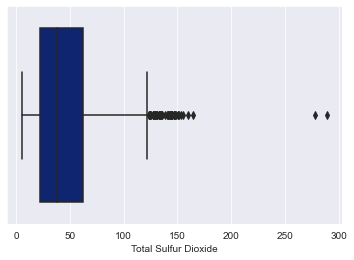

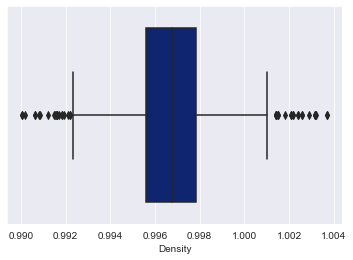

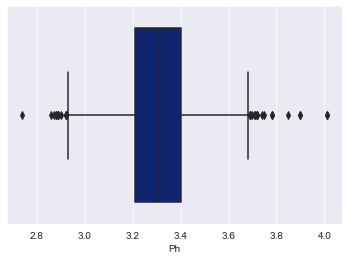

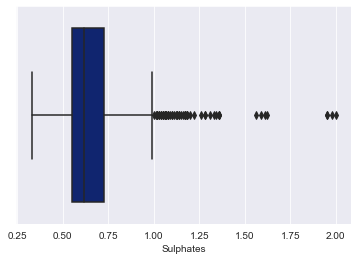

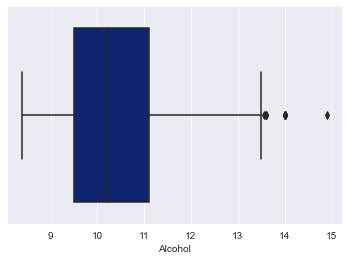

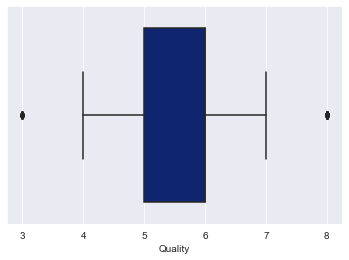

In [41]:
from matplotlib import pyplot as plt                         #to determine the count of each attribute in each column
for col in df.columns:
    sns.set_style('darkgrid')
    plt.figure()
    sns.boxplot(data=df,x=df[col],palette='dark')
    plt.xlabel(col.title())
plt.show()

Almost all columns have outliers which are needed to be removed

### Bivariate analysis

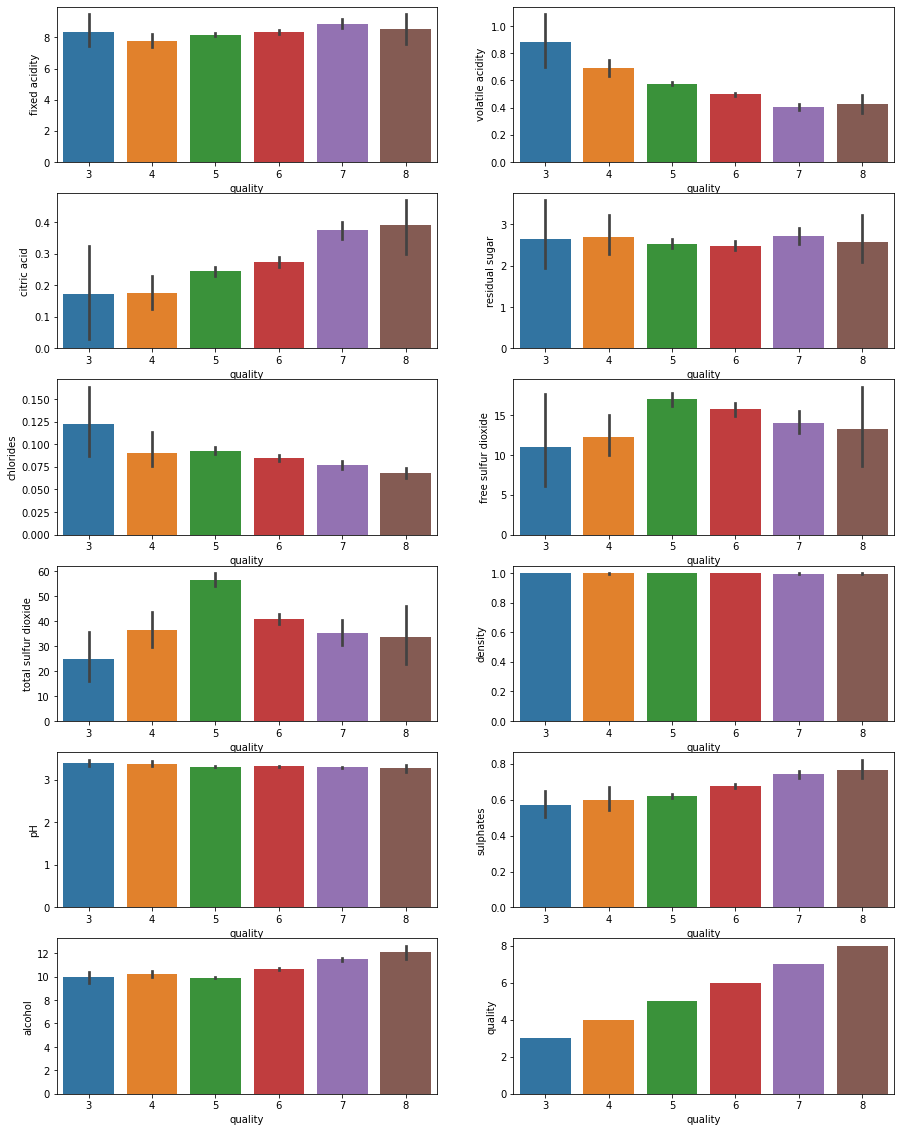

In [13]:
i=1
plt.figure(figsize=(15,20))
for col in df.columns:
    plt.subplot(6,2,i)
    sns.barplot(x=df['quality'], y= df[col])
    i+=1

### Multivariate analysis

<AxesSubplot:>

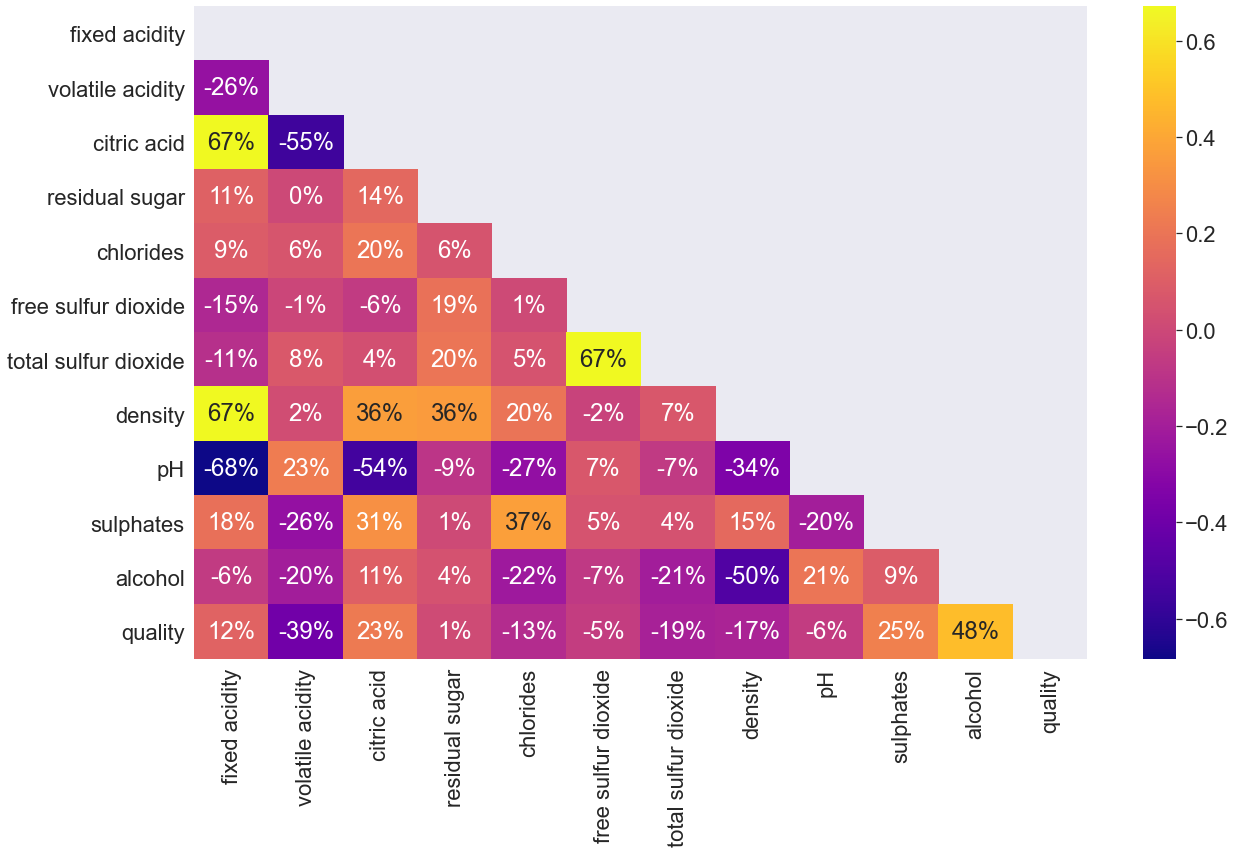

In [50]:
plt.figure(figsize=(20,12))
corr= df.corr()
matrix = np.triu(corr)
sns.heatmap(corr,annot=True,cmap='plasma',fmt='.0%',mask=matrix)

In [51]:
corr["quality"].sort_values(ascending=False)       #correlation of quality wwith other properties

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64

Wine quality is positively correlated with alcohol and negatively correlated with the volatile acidity

## Outlier and skewnes

From the above box plots we can clearly see that there are outliers in all columns BUT Here I am choosing not remove outliers as we are looking for accuracy to minute levels, high quality wine may have very rare composition (hence outlier) from other average quality wines, so we can not remove or modify outlier values in out dataset. Removing outliers in this dataset leads to 9% loss of precious data as well as increase in the skewness

In [19]:
from sklearn.preprocessing import power_transform                        #removing skewness using power_transform
df_new=df.drop(['quality','citric acid','density','pH'],axis=1)
df_correct=power_transform(df_new)
df_correct=pd.DataFrame(df_correct,columns=df_new.columns)
df_correct.skew()

fixed acidity           0.002529
volatile acidity        0.003099
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
sulphates               0.009985
alcohol                 0.112372
dtype: float64

In [20]:
df_3=df.drop(['alcohol','sulphates','fixed acidity','residual sugar','free sulfur dioxide','chlorides','total sulfur dioxide','volatile acidity'],axis=1)
df_3.head()

,citric acid,density,pH,quality
0,0.00,0.9978,3.51,5
1,0.00,0.9968,3.20,5
2,0.04,0.9970,3.26,5
3,0.56,0.9980,3.16,6
4,0.00,0.9978,3.51,5


In [21]:
# concatenating both dataframes with columns corrected skewness and columns without skewness
df_final=pd.concat([df_correct,df_3],axis=1)     
df_final

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,citric acid,density,pH,quality
0,-0.442666,0.995542,-0.597145,-0.172896,-0.268045,-0.124411,-0.581650,-1.075025,0.00,0.99780,3.51,5
1,-0.161308,1.771299,0.556565,0.786204,0.993852,0.854954,0.395140,-0.500860,0.00,0.99680,3.20,5
2,-0.161308,1.269801,0.152372,0.560696,0.193450,0.540394,0.183772,-0.500860,0.04,0.99700,3.26,5
3,1.522582,-1.550050,-0.597145,-0.226113,0.385115,0.693699,-0.392318,-0.500860,0.56,0.99800,3.16,6
4,-0.442666,0.995542,-0.597145,-0.172896,-0.268045,-0.124411,-0.581650,-1.075025,0.00,0.99780,3.51,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.380998,0.480036,1.397043,0.244351,-0.392318,0.292864,0.08,0.99490,3.45,5
1595,-1.767458,0.227895,-0.008632,-1.013159,1.727353,0.457504,0.874884,0.888124,0.10,0.99512,3.52,6
1596,-1.364367,0.000387,0.152372,-0.172896,1.235044,0.107498,0.820841,0.734558,0.13,0.99574,3.42,6
1597,-1.767458,0.728553,-0.380998,-0.226113,1.397043,0.244351,0.588344,-0.018800,0.12,0.99547,3.57,5


In [22]:
df_final.skew()                                                      #final skewness

fixed acidity           0.002529
volatile acidity        0.003099
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
sulphates               0.009985
alcohol                 0.112372
citric acid             0.318337
density                 0.071288
pH                      0.193683
quality                 0.217802
dtype: float64

# Dividing the Dataset

To determine the properties associated with quality of wine and predict the same, we will divide our wines as good, or bad.
All wines with quality 6 or above are good, rest are bad

In [23]:
df_final['Quality']=0
df_final.loc[df_final['quality']>6, 'Quality']=1
df_final.head()

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,citric acid,density,pH,quality,Quality
0,-0.442666,0.995542,-0.597145,-0.172896,-0.268045,-0.124411,-0.581650,-1.075025,0.00,0.9978,3.51,5,0
1,-0.161308,1.771299,0.556565,0.786204,0.993852,0.854954,0.395140,-0.500860,0.00,0.9968,3.20,5,0
2,-0.161308,1.269801,0.152372,0.560696,0.193450,0.540394,0.183772,-0.500860,0.04,0.9970,3.26,5,0
3,1.522582,-1.550050,-0.597145,-0.226113,0.385115,0.693699,-0.392318,-0.500860,0.56,0.9980,3.16,6,0
4,-0.442666,0.995542,-0.597145,-0.172896,-0.268045,-0.124411,-0.581650,-1.075025,0.00,0.9978,3.51,5,0


<AxesSubplot:xlabel='Quality', ylabel='count'>

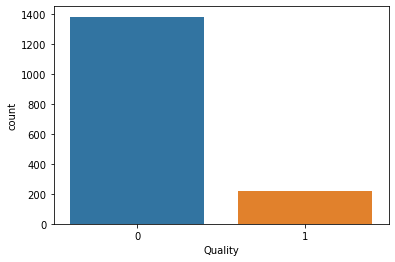

In [24]:
sns.countplot(df_final['Quality'])

The target variable is highly unbalanced and needs to be balanced

In [25]:
df_final['Quality'].value_counts()

0    1382
1     217
Name: Quality, dtype: int64

In [26]:
df_final.drop(['quality'], axis=1, inplace=True)
df_final

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,sulphates,alcohol,citric acid,density,pH,Quality
0,-0.442666,0.995542,-0.597145,-0.172896,-0.268045,-0.124411,-0.581650,-1.075025,0.00,0.99780,3.51,0
1,-0.161308,1.771299,0.556565,0.786204,0.993852,0.854954,0.395140,-0.500860,0.00,0.99680,3.20,0
2,-0.161308,1.269801,0.152372,0.560696,0.193450,0.540394,0.183772,-0.500860,0.04,0.99700,3.26,0
3,1.522582,-1.550050,-0.597145,-0.226113,0.385115,0.693699,-0.392318,-0.500860,0.56,0.99800,3.16,0
4,-0.442666,0.995542,-0.597145,-0.172896,-0.268045,-0.124411,-0.581650,-1.075025,0.00,0.99780,3.51,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.461202,0.497996,-0.380998,0.480036,1.397043,0.244351,-0.392318,0.292864,0.08,0.99490,3.45,0
1595,-1.767458,0.227895,-0.008632,-1.013159,1.727353,0.457504,0.874884,0.888124,0.10,0.99512,3.52,0
1596,-1.364367,0.000387,0.152372,-0.172896,1.235044,0.107498,0.820841,0.734558,0.13,0.99574,3.42,0
1597,-1.767458,0.728553,-0.380998,-0.226113,1.397043,0.244351,0.588344,-0.018800,0.12,0.99547,3.57,0


# Oversampling

In [27]:
from sklearn.utils import resample, shuffle

zero= df_final[df_final['Quality']==0]
ones= df_final[df_final['Quality']==1]

upsampled= resample(ones, replace=True, n_samples=zero.shape[0])

df_balanced= pd.concat([zero, upsampled])
df_balanced= shuffle(df_balanced)

<AxesSubplot:xlabel='Quality', ylabel='count'>

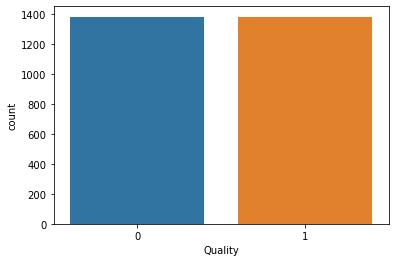

In [28]:
sns.countplot(df_balanced['Quality'])

The target variable 'Quality' is balanced now

# Scaling

In [29]:
from sklearn.preprocessing import StandardScaler
df_x= df_balanced.drop('Quality', axis=1)
y= df_balanced['Quality']
sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10
0,0.370947,-2.588824,-0.884574,-0.035297,-0.314882,-0.626122,0.649589,0.912878,0.677062,-0.439299,0.705053
1,0.952920,-0.776889,-0.248738,-1.457145,-1.245109,-1.752040,0.221347,1.021051,0.826047,-0.888348,-0.664424
2,1.069643,0.296630,0.224495,1.178637,-1.012294,-1.083426,0.008900,0.855758,1.620634,0.411030,-1.381769
3,0.830184,-0.118061,-0.075938,0.657384,-0.314882,0.313206,0.221347,0.912878,0.726724,-0.028466,-0.794851
4,-0.005908,-0.243209,0.475668,0.378549,1.475935,0.735790,0.593609,-2.757060,0.875709,1.127599,0.248560
...,...,...,...,...,...,...,...,...,...,...,...
2759,0.161974,-1.215895,-1.145732,-0.828898,-1.012294,-1.083426,0.535997,0.855758,0.180446,-0.573058,-0.012292
2760,1.251997,-1.370476,0.416887,0.420545,-0.314882,-0.384836,-0.391274,0.855758,1.819281,0.267716,-0.794851
2761,-0.184377,-0.776889,-0.650299,-0.581210,-1.245109,-1.617060,-1.068352,0.464375,0.230107,-1.074656,-0.207932
2762,0.215747,-0.056640,0.475668,0.461798,0.798787,0.598089,1.326265,-0.781276,-0.018201,0.840971,0.444200


# Random state determination

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
maxAccu = 0
maxRS = 0

for i in range(1,200):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=i)
    lg = LogisticRegression()
    lg.fit(x_train, y_train)
    pred = lg.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print("Best accuracy is: ",maxAccu,"on Random State: ",maxRS)

Best accuracy is:  0.8421686746987952 on Random State:  149


# Train and test split

In [150]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=149)

# Model Training 

--------------------LogisticRegression-------------

In [35]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

scr = cross_val_score(LR, x, y, cv=5)
print("Cross Validation score of Logistic Regression: ",scr.mean())

0.791566265060241
[[327  90]
 [ 83 330]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       417
           1       0.79      0.80      0.79       413

    accuracy                           0.79       830
   macro avg       0.79      0.79      0.79       830
weighted avg       0.79      0.79      0.79       830

Cross Validation score of Logistic Regression:  0.8002974552506747


------------------DecisionTreeClassifier-----------------

In [36]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print(accuracy_score(y_test, preddt))
print(confusion_matrix(y_test, preddt))
print(classification_report(y_test, preddt))

scr = cross_val_score(dt, x, y, cv=5)
print("Cross Validation Scores for Decision Tree: ",scr.mean())

0.9397590361445783
[[372  45]
 [  5 408]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94       417
           1       0.90      0.99      0.94       413

    accuracy                           0.94       830
   macro avg       0.94      0.94      0.94       830
weighted avg       0.94      0.94      0.94       830

Cross Validation Scores for Decision Tree:  0.9504304583693687


-------------------------RandomForestClassifier----------------

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = rf.predict(x_test)
print(accuracy_score(y_test, predrf))
print(confusion_matrix(y_test, predrf))
print(classification_report(y_test, predrf))

scr = cross_val_score(rf, x, y, cv=5)
print("Cross Validation Scores for Random Forest: ",scr.mean())

0.9578313253012049
[[391  26]
 [  9 404]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       417
           1       0.94      0.98      0.96       413

    accuracy                           0.96       830
   macro avg       0.96      0.96      0.96       830
weighted avg       0.96      0.96      0.96       830

Cross Validation Scores for Random Forest:  0.9746710957360379


-------------------------SVC-------------------

In [48]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(x_train, y_train)
predsvc = svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

scr = cross_val_score(svc, x, y, cv=5)
print("Cross Validation Score for Support Vector Classifier: ",scr.mean())

0.8650602409638555
[[350  67]
 [ 45 368]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.86       417
           1       0.85      0.89      0.87       413

    accuracy                           0.87       830
   macro avg       0.87      0.87      0.86       830
weighted avg       0.87      0.87      0.86       830

Cross Validation Score for Support Vector Classifier:  0.8780774169877088


# Final model

# Hyper-parameter tuning

In [55]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(probability=True), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.811 total time=   1.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.824 total time=   1.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.835 total time=   1.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.796 total time=   1.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.816 total time=   1.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.811 total time=   0.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.822 total time=   0.7s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.798 total time=   0.7s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.798 total time=   0.7s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.813 total time=   0.7s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.793 total time=   0.7s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [56]:
print(grid.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}


In [57]:
print(grid.best_estimator_)

SVC(C=10, gamma=1, probability=True)


In [58]:
grid_predictions = grid.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       417
           1       0.99      0.98      0.98       413

    accuracy                           0.98       830
   macro avg       0.98      0.98      0.98       830
weighted avg       0.98      0.98      0.98       830



# ROC curve

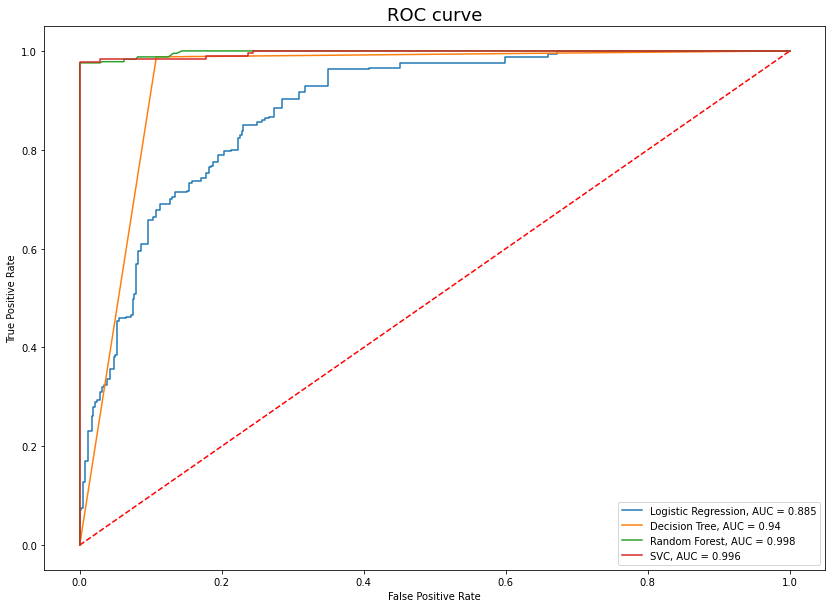

In [59]:
fig = plt.figure(figsize=(14,10))
plt.plot([0, 1], [0, 1],'r--')

#Logistic Regression
preds_proba_lg = LR.predict_proba(x_test)
probslg = preds_proba_lg[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probslg)
auclg = roc_auc_score(y_test, probslg)
plt.plot(fpr, tpr, label=f'Logistic Regression, AUC = {str(round(auclg,3))}')

#Decision Tree Classifier
preds_proba_DTC = dt.predict_proba(x_test)
probsDTC = preds_proba_DTC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsDTC)
aucDTC = roc_auc_score(y_test, probsDTC)
plt.plot(fpr, tpr, label=f'Decision Tree, AUC = {str(round(aucDTC,3))}')

#Random Forest
preds_proba_RFC = rf.predict_proba(x_test)
probsRFC = preds_proba_RFC[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probsRFC)
aucRFC = roc_auc_score(y_test, probsRFC)
plt.plot(fpr, tpr, label=f'Random Forest, AUC = {str(round(aucRFC,3))}')

#SVC
preds_proba_svc = grid.predict_proba(x_test)
probssvc = preds_proba_svc[:, 1]
fpr, tpr, thresh = roc_curve(y_test, probssvc)
aucsvc = roc_auc_score(y_test, probssvc)
plt.plot(fpr, tpr, label=f'SVC, AUC = {str(round(aucsvc,3))}')


plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.title("ROC curve")
plt.rcParams['axes.titlesize'] = 18
plt.legend()
plt.show()

ROC curve graph showing the performance of the classification models at all classification thresholds. SVC is performing with an auc of 0.99.

# Modal Saving

In [61]:
import joblib
joblib.dump(grid, 'Red_wine_quality_predictive_model.pkl')

['Red_wine_quality_predictive_model.pkl']